<a href="https://colab.research.google.com/github/Siddha-Regilla/Data-Science-Classroom-notebooks/blob/main/Logistic_Regression_26_02_2024_%26_27_02_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
#Importing Library
import pandas as pd
import numpy as np
from numpy import argmax # used to find out the best value of the given values
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm   # to get the summary of the model
#from sklearn.model_selection import train_test_split # train and test
from sklearn import metrics # To create confusion matrix
from sklearn.metrics import confusion_matrix # Used for confusion matrix
from sklearn.metrics import accuracy_score # To identify the perfect threshold value to get the most accurate model
#from sklearn import preprocessing
from sklearn.metrics import classification_report #for finding out the accurarcy, recall, F1 score, precision, etc
from sklearn.metrics import roc_auc_score # To find out the accurarcy of the model
from sklearn.metrics import roc_curve # To find out the accurarcy of the model
import warnings

In [2]:
#Importing functions from the above library
warnings.filterwarnings('ignore')

In [3]:
# Upload dataset - claimants.csv
# reading a csv file using pandas library
claimants = pd.read_csv("claimants.csv")
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


# Step 1 - EDA

# 1. Visualize the data - as most columns have data as 0,1 only few visualizations can be done

# 2. We also need to handle null values


# Ways to handle null value -
1. As seen in Linear regression, we drop the outliers or null values
2. Carry out imputation, i.e., we replace the null value with some other alternate value

In [4]:
# Exploring the data
# Here we understand how many null values are there
# claimants.head(10)
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [5]:
# Describing the data set
claimants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


<Axes: xlabel='ATTORNEY', ylabel='CLMAGE'>

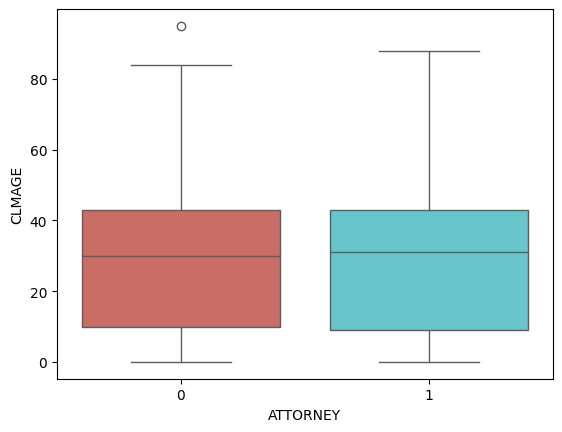

In [6]:
# We start creating visualizations
# 0 means going to hire attorney and 1 means not going to hire
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")  # palette help add different colours for the different box plot
# We can see that median for age of people hiring attorney is higer than those not hiring
# The max value is greater for people hiring

In [7]:
# Droping first column - casenum as it is irrellavent to build the model
claimants.drop(["CASENUM"],inplace=True,axis = 1) # inplace=True means after dropping the column, the dataframe will be modified
#cat_cols = ["ATTORNEY","CLMSEX","SEATBELT","CLMINSUR"]
#cont_cols = ["CLMAGE","LOSS"]

# Getting the barplot for the categorical columns

In [8]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


<Axes: xlabel='ATTORNEY', ylabel='count'>

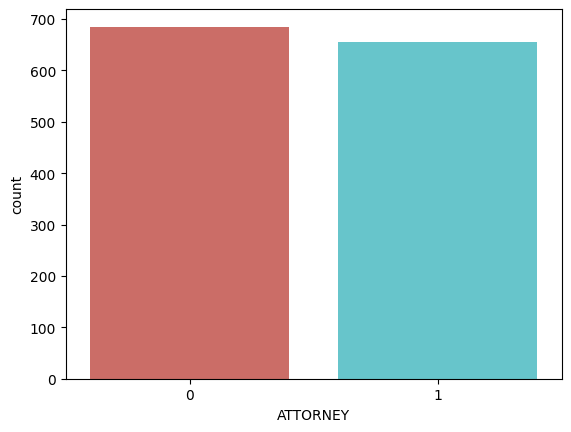

In [9]:
# Going to count the no. of obs. in both the categories
# Total no. of people hiring the attorney (0) is higher than those not hiring (1)
sb.countplot(x="ATTORNEY",data=claimants,palette="hls")

In [10]:
# Preparing a crosstab to identify claimant with or without insurence who are either consulting a lawyer or not
# Attorney - 0 is hiring and 1 is not hiring
# CLMINSUR - 0 is not having and 1 is having
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR)

CLMINSUR,0.0,1.0
ATTORNEY,,
0,76,585
1,44,594


<Axes: xlabel='ATTORNEY'>

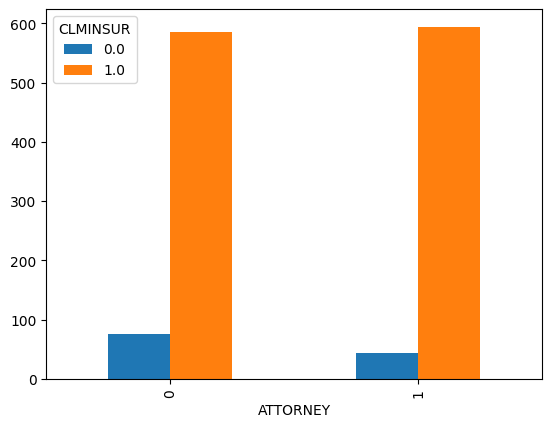

In [11]:
# We can also prepare the bar chart for the same
pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind = 'bar')

<Axes: xlabel='SEATBELT', ylabel='count'>

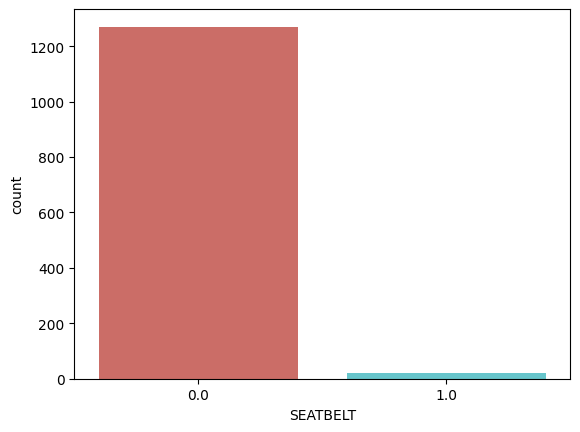

In [12]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")
# People wearing seat belt is much higher than people not wearing

<Axes: xlabel='CLMINSUR', ylabel='count'>

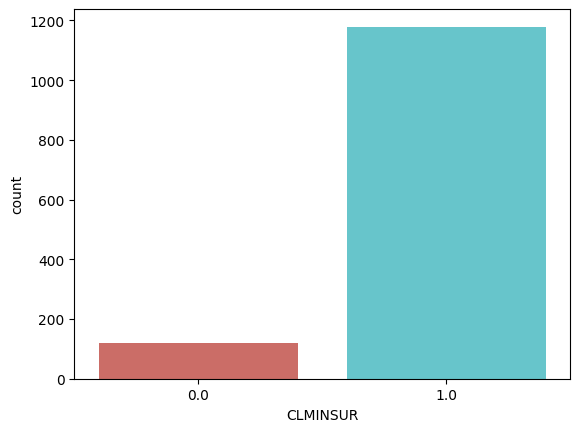

In [13]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")
# People having insurence is much higher that people not having

<Axes: xlabel='SEATBELT'>

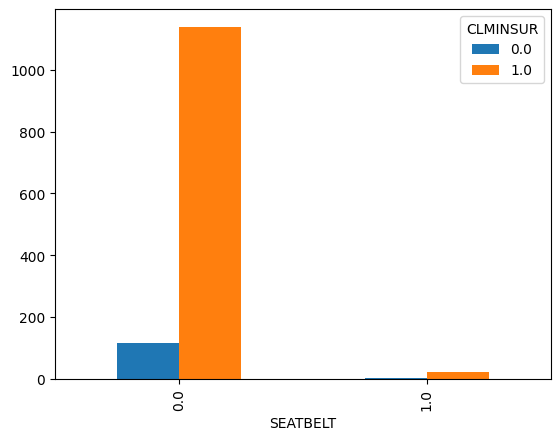

In [14]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

<Axes: xlabel='CLMSEX', ylabel='count'>

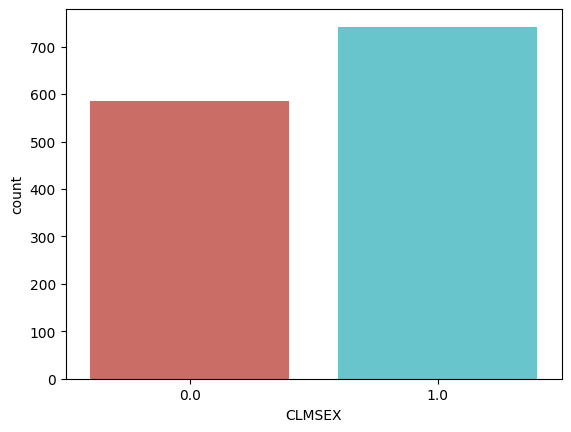

In [15]:
sb.countplot(x="CLMSEX",data=claimants,palette="hls")
# No of female claiments is more than the male claiments

<Axes: xlabel='CLMSEX'>

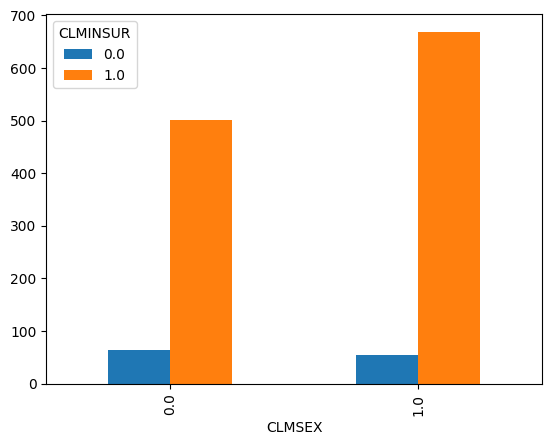

In [16]:
pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar")

In [17]:
# Total no. of null values in the dataset
claimants.isnull().sum()
#claimants.shape # 1340 6 => Before dropping null values
# To drop null values ( dropping rows)
#claimants.dropna().shape # 1096 6 => After dropping null values

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [18]:
# As we have null values, we will carry out imputation.
# If we are working with numerical columns, we can apply either - mean or median imputation technique
# If we are working with categorical columns, we can apply - mode imputation technique

In [19]:
# Fill nan values with mode of the categorical column as observed in the above visualizations as the columns are categorical
claimants["CLMSEX"].fillna(1,inplace=True) # claimants.CLMSEX.mode() = 1 as most were female
claimants["CLMINSUR"].fillna(1,inplace=True) # claimants.CLMINSUR.mode() = 1 as most have insurence
claimants["SEATBELT"].fillna(0,inplace=True) # claimants.SEATBELT.mode() = 0 as most are wearing seat belt

In [20]:
#claimants.CLMSEX.mode()
#claimants.CLMINSUR.mode()
#claimants.SEATBELT.mode()
claimants.CLMAGE.mean()

28.414422241529106

In [21]:
# Fill nan values with mean (we can also use median) of the numeric column as observed in the above code -  as the columns are numeric
claimants.CLMAGE.fillna(28.4144,inplace=True) # claimants.CLMAGE.mean() = 28.4

In [22]:
# Cross checking the number of null values
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [23]:
# Model building
claimants.shape

(1340, 6)

In [24]:
# Dividing the dataset into independent variables (X) and target variable (Y)
X = claimants.iloc[:,[1,2,3,4,5]]
Y = claimants.iloc[:,0]
# Fitting the logistic regression model onto the X & Y
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [25]:
# coefficients of features - B1, B2, B3, B4, B5
classifier.coef_

array([[ 0.31711334,  0.5055713 , -0.52814335,  0.0066041 , -0.3224325 ]])

In [26]:
# Gives the probability of values of 0 and 1 -
classifier.predict_proba (X) # Probability values

array([[9.99974075e-01, 2.59253819e-05],
       [4.95386951e-01, 5.04613049e-01],
       [4.25082812e-01, 5.74917188e-01],
       ...,
       [2.85349951e-01, 7.14650049e-01],
       [6.86685509e-01, 3.13314491e-01],
       [3.38781941e-01, 6.61218059e-01]])

In [27]:
# We are using the model and predicting y
y_pred = classifier.predict(X)
# We are storing the new predicted values in a new columns
claimants["y_pred"] = y_pred
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred
0,0,0.0,1.0,0.0,50.0000,34.940,0
1,1,1.0,0.0,0.0,18.0000,0.891,1
2,1,0.0,1.0,0.0,5.0000,0.330,1
3,0,0.0,1.0,1.0,31.0000,0.037,1
4,1,0.0,1.0,0.0,30.0000,0.038,1
...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1
1336,0,1.0,1.0,0.0,46.0000,3.705,0
1337,1,1.0,1.0,0.0,39.0000,0.099,1
1338,0,1.0,0.0,0.0,8.0000,3.177,0


In [28]:
# Creating a dataframe for the probability values of the predictions and storing it in a new column
# Basically, whichever class has higher probabilty value, the model will be predicting those values
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([claimants,y_prob],axis=1)
new_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.0000,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.0000,0.891,1,0.495387,0.504613
2,1,0.0,1.0,0.0,5.0000,0.330,1,0.425083,0.574917
3,0,0.0,1.0,1.0,31.0000,0.037,1,0.490007,0.509993
4,1,0.0,1.0,0.0,30.0000,0.038,1,0.363271,0.636729
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,28.4144,0.576,1,0.406789,0.593211
1336,0,1.0,1.0,0.0,46.0000,3.705,0,0.549435,0.450565
1337,1,1.0,1.0,0.0,39.0000,0.099,1,0.285350,0.714650
1338,0,1.0,0.0,0.0,8.0000,3.177,0,0.686686,0.313314


In [29]:
# Using the actual values and predicted values we will create the confusion matrix
# It tell us the TP and TP and also the FP and FN
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)


[[435 250]
 [147 508]]


In [30]:
pd.crosstab(y_pred,Y)

ATTORNEY,0,1
row_0,,
0,435,147
1,250,508


In [31]:
#type(y_pred)
# Finding out the accurarcy of the model -> (TP+TN)/(TP+TN+FP+FN)
accuracy = sum(Y==y_pred)/claimants.shape[0]
accuracy

0.7037313432835821

In [32]:
# Gives the report of the precision, recall, F1-score and support
# It needs the actual and prediced values
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       685
           1       0.67      0.78      0.72       655

    accuracy                           0.70      1340
   macro avg       0.71      0.71      0.70      1340
weighted avg       0.71      0.70      0.70      1340



In [33]:
# Finding out the accurarcy of the model
Logit_roc_score=roc_auc_score(Y,classifier.predict(X)) # we are getting the area under the curve
Logit_roc_score

0.7053045077171672

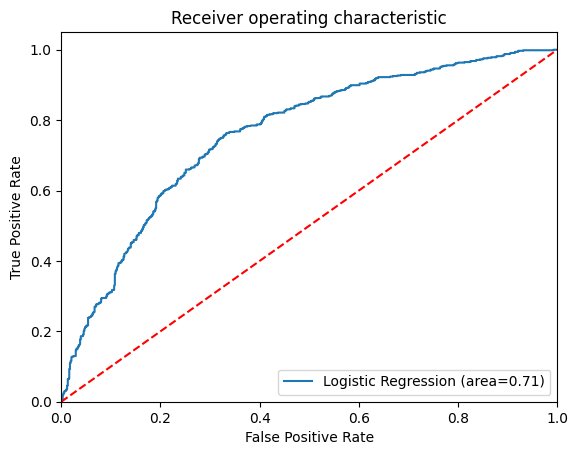

In [34]:
# We are plotting the ROC curve
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) # when we plot the ROC curve, we can get the fpr, tpr and also the thresholds
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--') # plotting the dummy classification model in red -- line
plt.xlim([0.0, 1.0]) # set some x-axis limits
plt.ylim([0.0, 1.05]) # setting some y-axis limits
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1])

In [36]:
y_prob1

,0
0,0.000026
1,0.504613
2,0.574917
3,0.509993
4,0.636729
...,...
1335,0.593211
1336,0.450565
1337,0.714650
1338,0.313314


In [37]:
# Current accurarcy = 70%
# We need to improve the accurarcy of model.
# As sklearn library doen't have summary function, we can use stats.model.api library to build the logistic regression model and use the summary function

In [38]:
#fitting the model using stats.model.api library
logit = sm.Logit(Y, X)

In [39]:
logit.fit().summary()
# We compare and identify the variables that are insignificant based on their p-value. If their p-value > 0.05 then they are insignificant

Optimization terminated successfully.
         Current function value: 0.609294
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               ATTORNEY   No. Observations:                 1340
Model:                          Logit   Df Residuals:                     1335
Method:                           MLE   Df Model:                            4
Date:                Fri, 07 Jun 2024   Pseudo R-squ.:                  0.1207
Time:                        06:53:08   Log-Likelihood:                -816.45
converged:                       True   LL-Null:                       -928.48
Covariance Type:            nonrobust   LLR p-value:                 2.515e-47
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CLMSEX         0.3005      0.116      2.591      0.010       0.073       0.528
CLMINSUR       0.4167      0.124      3.364      0.001       0.174       0.660
SEATBELT      -0.6828      0.522     -1.308      0.191      -1.706       0.341
CLMAGE         0.0059      0.003      1.951      0.051   -2.58e-05       0.012
LOSS          -0.3262      0.029    -11.234      0.000      -0.383      -0.269
==============================================================================
"""

In [40]:
#fpr

In [41]:
#tpr

In [42]:
# The default threshold value of sklearn is 50%. But that isn't always the most accurate threshold value.
# We take every threshold value to and if the probability of 1 is > than threshold value then we'll print 1
# Therefore, for every threshold value we'll find out the predictions, then we compare the value with the actual value
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(classifier.predict_proba(X)[:,1]>thres,1,0) # if probability of 1 is > than threshold value then it'll print 1
    accuracy_ls.append(accuracy_score(Y, y_pred, normalize=True)) # we find out the accurarcy and we are storing the value in the above created empty list

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy'] # in the empty list created, we are creating 2 new columns
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True) # all the values are sorted in the descending value in the 2 new columns
accuracy_ls

,thresholds,accuracy
317,5.324383e-01,0.713433
321,5.285764e-01,0.713433
322,5.250800e-01,0.713433
310,5.392288e-01,0.712687
312,5.370079e-01,0.712687
...,...,...
0,1.769008e+00,0.511194
1,7.690085e-01,0.511194
551,1.432688e-11,0.492537
552,7.980210e-12,0.491791


In [44]:
# Among the above derived cutoff values(threshold values), we are trying to find out the best threshold value
J = tpr - fpr # the larger the value of J the better is the model
ix = argmax(J)
best_thresh = thresholds[ix] # assigning the best cutoff value
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.525080


In [46]:
threshold = 0.525080
preds = np.where(classifier.predict_proba(X)[:,1] > threshold, 1, 0) # This code says that, if the probability of 1 is > threshold, then it'll predict 1
print(classification_report(Y,preds))

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       685
           1       0.69      0.76      0.72       655

    accuracy                           0.71      1340
   macro avg       0.72      0.71      0.71      1340
weighted avg       0.72      0.71      0.71      1340

